In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Ethereum/RawTechnical_plus_Old.csv')

# Assuming 'Close' is the closing price column from which we will derive the target
# Create a binary target variable: 1 if the price increased, 0 otherwise
# df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop the last row as it now contains a NaN in the 'Target'
# df.dropna(subset=['Target'], inplace=True)

# Splitting the dataset into features and target
X = df.drop(['Price_Direction'], axis=1)
y = df['Price_Direction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.75390625


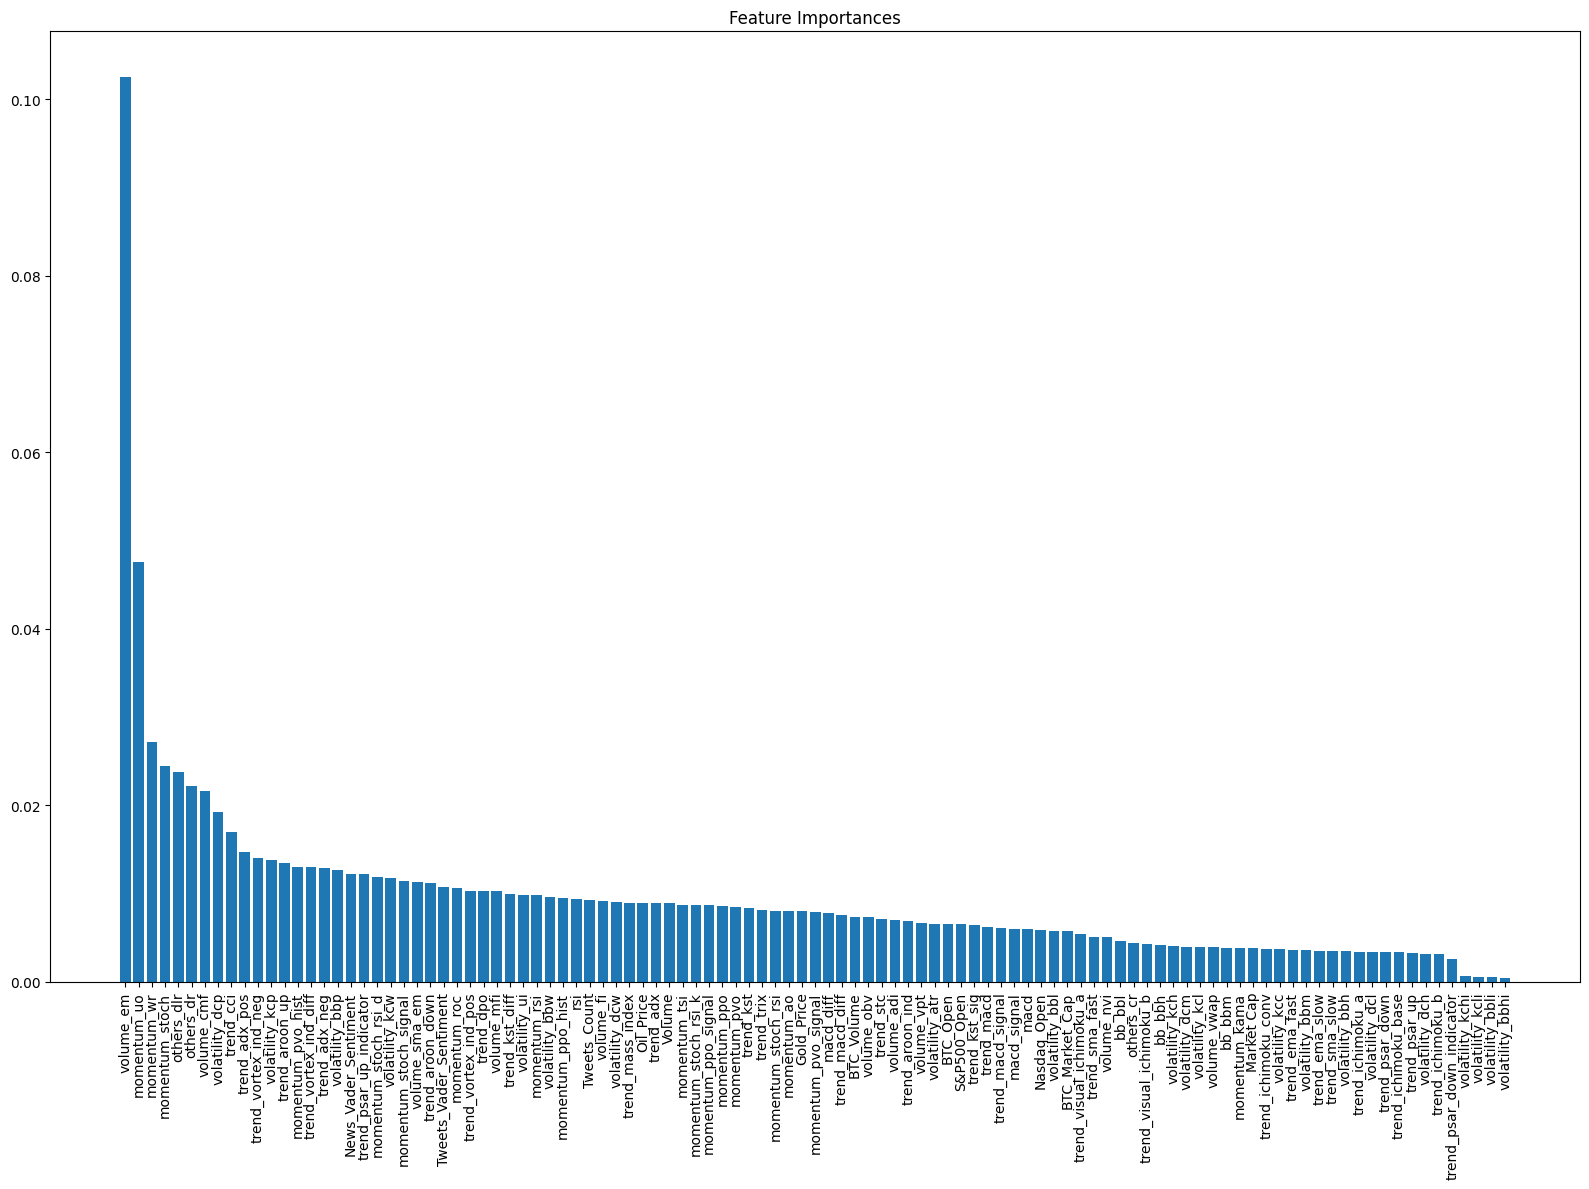

In [8]:
import matplotlib.pyplot as plt

# Get feature importances and sort them
importances = rf.feature_importances_
sorted_indices = importances.argsort()[::-1]

# Plotting
plt.figure(figsize=(16, 12))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
